# Group 5 Project Proposal - Glass Classification

## Introduction

The classification of glass types can be incredibly important during criminological investigations. At the scene of a crime, glass can be used as evidence so it is important to correctly determine if two or more glass fragments originated from different sources. This can lead to identifying methods of escape, murder weapons, and other pieces of conclusive evidence.  

Our goal is to create a model that is successful in identifying glass samples obtained from a crime scene based on the weight percentages of 8 corresponding oxides. More specifically, we hope to answer the question: Given the weight percent of 8 glass oxides from a glass sample, which of the 6 glass types is it?  

The particular dataset we have chosen comes from the USA Forensic Science Service and classifies 6 types of glass based on their oxide content (see below for more details). The dataset also contains the refractive index of each glass observation.

Note that float-processing is a glass manufacturing process that creates a smooth, thick and uniform surface. In this dataset, there is no data for “vehicle_windows_non_float_processed” glass.

<b>More details on the glass identification dataset:</b>

<b>Glass Oxides (measured in weight percent)</b>
<ul>
<li>Na: Sodium</li>
<li>Mg: Magnesium</li>
<li>Al: Aluminum</li>
<li>Si: Silicon</li>
<li>K: Potassium</li>
<li>Ca: Calcium</li>
<li>Ba: Barium</li>
<li>Fe: Iron</li>
</ul>
<b>Glass Types</b>
<ul>
<li>building_windows_float_processed</li>
<li>building_windows_non_float_processed</li>
<li>vehicle_windows_float_processed</li>
<li>vehicle_windows_non_float_processed (**none in this dataset**)</li>
<li>containers</li>
<li>tableware</li>
<li>headlamps</li>
</ul>

## Preliminary Exploratory Data Analysis

#### Read data from the web & Clean data into tidy format

In [ ]:
library(tidyverse)
library(repr)
library(tidymodels)

In [ ]:
dataset_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
col_names <- c("id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass_type")
glass_data_raw <- read.table(dataset_url, sep =",", header = FALSE, col.names = col_names) |>
    mutate(glass_type = as_factor(glass_type))
glass_data_raw

glass_type_names <- c("building_windows_float_processed", "building_windows_non_float_processed", "vehicle_windows_float_processed", "containers", "tableware", "headlamps")
glass_data_processed <- glass_data_raw |> select(-RI)
levels(glass_data_processed$glass_type) <- glass_type_names
glass_data_processed

#### Summarize the data with the training set

In [ ]:
glass_split <- initial_split(glass_data_processed, prop = 0.75, strata = glass_type)
glass_training <- training(glass_split)
glass_testing <- testing(glass_split)

In [ ]:
glass_summary <- glass_training |>
                        group_by(glass_type) |>
                        mutate(count = 1) |>
                        summarize(count = sum(count),
                                  avg_Na = mean(Na), avg_Mg = mean(Mg), 
                                  avg_Al = mean(Al), avg_Si = mean(Si), 
                                  avg_K = mean(K), avg_Ca = mean(Ca), 
                                  avg_Ba = mean(Ba), avg_Fe = mean(Fe)) 
glass_summary

#### Visualize the data with the training set

From the training data that includes the oxide types along with the glass identifications, a bar graph comparing the two predictor variables will be the best way to visualize this analysis.As shown below, each glass type is its own bar graph which compares the 8 oxide types on the x-axis to the weight percentage of each oxide on the y-axis.Afterwards, we will align the separate bar graphs beside one another to visually compare any differences in the glass types before comparing numerically.

## Methods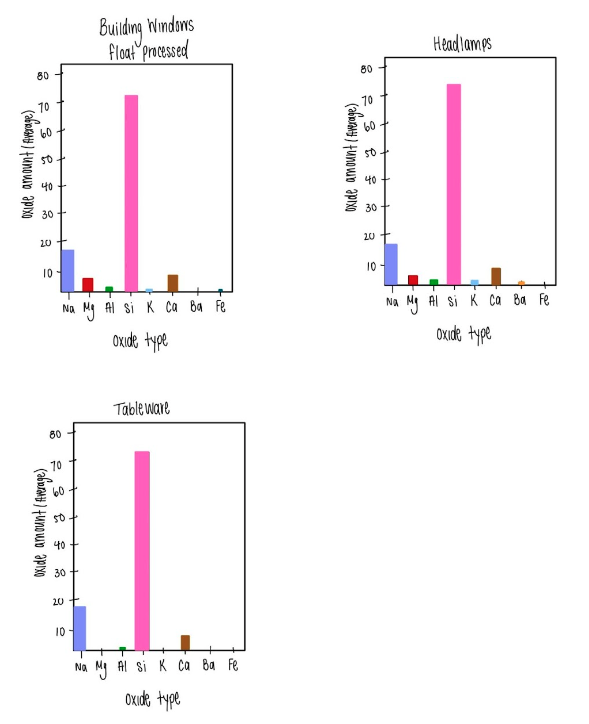

#### Data Analysis Explanation

Glass type will be predicted by the 8 oxides variables. The model will be trained using a subset of the processed data (training set). We will equalize the number of points for each glass label by oversampling the rare observations to avoid any biases stemming from observation imbalances. We will use cross-validation over multiple k-values and select the k that provides the highest average accuracy. This model will then predict the glass type on the testing set and the accuracy of predictions will be computed to assess the model. Additionally, we will interpret the accuracy of the predictions in the context of our project and how helpful it is to identify glass types during criminal investigations.

#### Visualizing the Results

We plan on creating a bar graph to visualize our data analysis and the results. We will compare the distribution of each predictor variable, the 8 oxide types (x-axis), to the weight percentages (y-axis). We will then align each of the graphs next to each other for a visual comparison before comparing the values numerically to provide insight into our project question.

## Expected Outcomes and Significance

#### What do you expect to find?

Based on the analysis and our results we expect to find that float-processed glass has the highest silicon content because we learned that float-processing is a glass manufacturing process that creates a smooth, thick and uniform surface. We also expect to see that each glass type has a distinguishing ratio of weight percentages of oxides.

#### What impact could such findings have?

In forensics, identifying a sample of glass found at the scene could help identify the origin of criminal activities. If the glass type is correctly identified it can also be used as evidence. Hence, improving the efficiency of glass analysis can directly impact how, and how fast, law enforcement can find criminals guilty or innocent.

#### What future questions could this lead to?

This analysis can lead to further research and an improvement in the Forensic Science field for quickly classifying the glass found at a crime scene given the oxide content. This can answer the following questions such as, “Given the location of the crime scene, what is the most common glass type found?” as well as, “How does the density of a particular glass sample relate to its weight percentages of corresponding oxides?”